<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset.


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
# prompt: Task 1: Identify Duplicate Rows
# Count the number of duplicate rows in the dataset.
# Display the first few duplicate rows to understand their structure.

# Count the number of duplicate rows
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")

# Display the first few duplicate rows
print("\nFirst few duplicate rows:")
print(duplicate_rows.head())


Number of duplicate rows: 20

First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to ope

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
# prompt: Task 2: Analyze Characteristics of Duplicates
# Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
# Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.

# Identify duplicate rows based on 'MainBranch', 'Employment', and 'RemoteWork'
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_subset = df[df.duplicated(subset=subset_columns, keep=False)]

# Analyze which columns frequently have identical values within these duplicates
identical_columns = {}
for col in df.columns:
    if col not in subset_columns:
        identical_values = duplicate_subset.groupby(subset_columns)[col].nunique().value_counts()
        identical_columns[col] = identical_values

# Print the analysis
for col, value_counts in identical_columns.items():
    print(f"\nAnalysis for column '{col}':")
    print(value_counts)
    # Example: Check if a column has predominantly identical values within the duplicate groups
    if 1 in value_counts and value_counts[1] / sum(value_counts) > 0.8: # Adjust the threshold as needed
      print(f"Column '{col}' has predominantly identical values within duplicate groups.")




Analysis for column 'ResponseId':
ResponseId
2      63
3      31
4      28
5      17
6      15
       ..
39      1
38      1
220     1
120     1
70      1
Name: count, Length: 94, dtype: int64

Analysis for column 'Age':
Age
2    97
3    64
4    51
1    30
5    24
6    24
7    16
8    13
Name: count, dtype: int64

Analysis for column 'Check':
Check
1    319
Name: count, dtype: int64
Column 'Check' has predominantly identical values within duplicate groups.

Analysis for column 'CodingActivities':
CodingActivities
2     70
3     36
4     23
5     18
7     17
6     17
8     10
13     9
11     8
10     7
9      7
15     6
22     5
14     5
25     5
34     4
16     4
21     4
19     3
17     3
24     3
12     3
50     3
28     3
32     3
29     3
44     2
18     2
33     2
20     2
38     2
37     2
31     2
30     2
69     2
40     2
67     1
57     1
52     1
48     1
27     1
1      1
90     1
23     1
41     1
86     1
43     1
49     1
79     1
39     1
35     1
46     1
76     1
47 

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


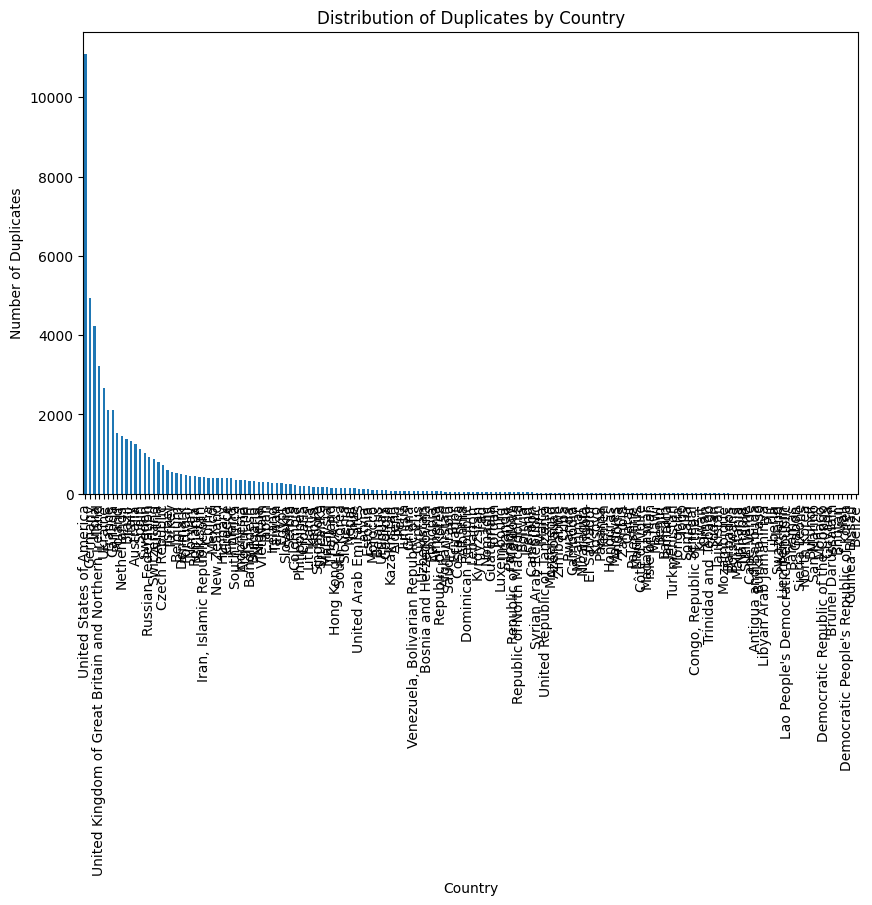

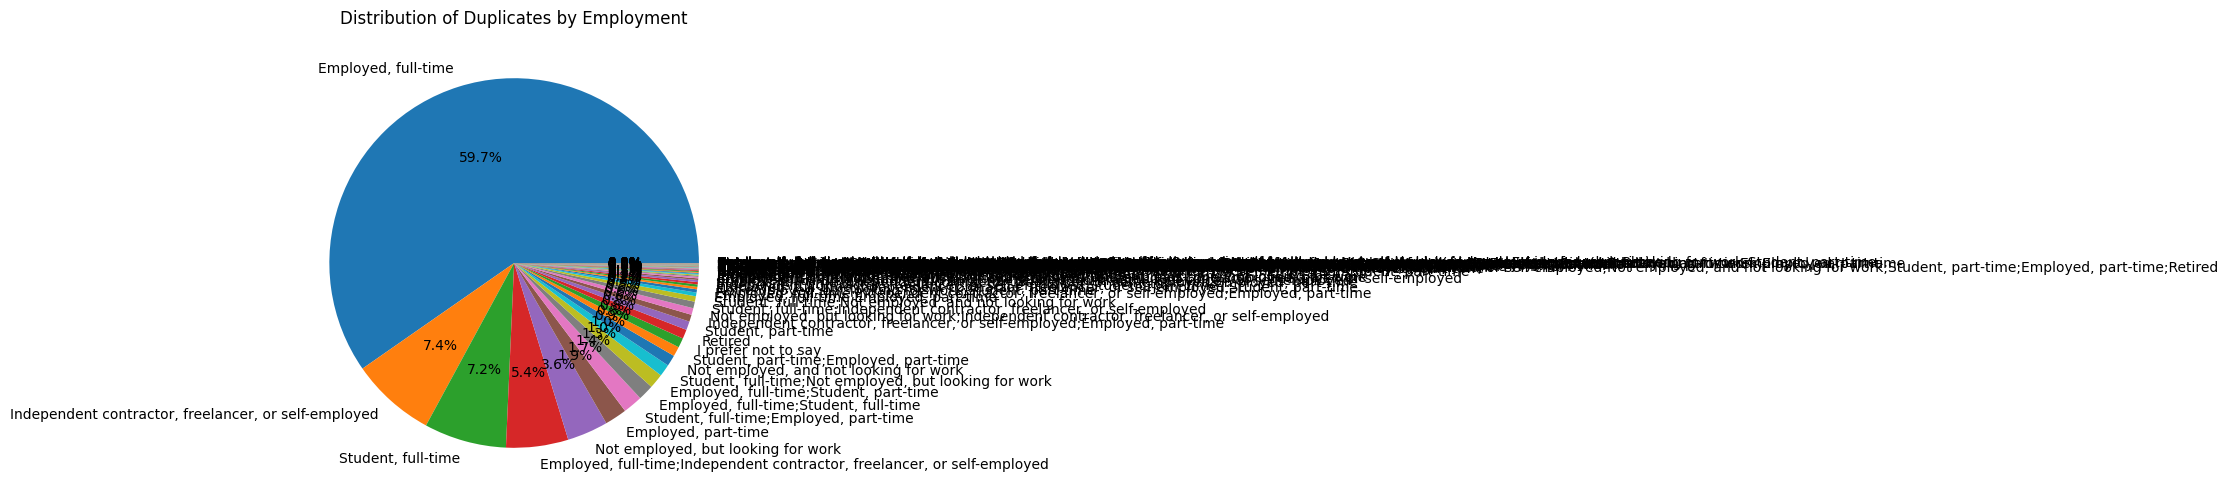

In [8]:
# prompt: Task 3: Visualize Duplicates Distribution
# Create visualizations to show the distribution of duplicates across different categories.
# Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.

import matplotlib.pyplot as plt

# Duplicate counts by Country
country_duplicates = df[df.duplicated(subset=['Country'], keep=False)]['Country'].value_counts()
plt.figure(figsize=(10, 6))
country_duplicates.plot(kind='bar')
plt.title('Distribution of Duplicates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.show()

# Duplicate counts by Employment
employment_duplicates = df[df.duplicated(subset=['Employment'], keep=False)]['Employment'].value_counts()
plt.figure(figsize=(10, 6))
employment_duplicates.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Duplicates by Employment')
plt.ylabel('') # Remove the default y-axis label
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [13]:
# prompt: Task 4: Strategic Removal of Duplicates
# Decide which columns are critical for defining uniqueness in the dataset.
# Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.

# Remove duplicates based on a subset of columns
# Check if the column name 'Respondent' exists, and if not, try other variations
if 'Respondent' in df.columns:
    columns_for_uniqueness = ['respondent', 'MainBranch', 'Employment', 'Country']
elif 'respondent' in df.columns:
    columns_for_uniqueness = ['respondent', 'MainBranch', 'Employment', 'Country']
elif 'RESPONDENT' in df.columns:
    columns_for_uniqueness = ['RESPONDENT', 'MainBranch', 'Employment', 'Country']
else:
    # Handle the case where none of the variations are found
    print("Error: Column 'Respondent' or its variations not found in the DataFrame.")
    columns_for_uniqueness = ['MainBranch', 'Employment', 'Country']  # Use alternative columns for uniqueness

df_no_duplicates = df.drop_duplicates(subset=columns_for_uniqueness, keep='first')

# Print some info
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing duplicates: {df_no_duplicates.shape}")


Error: Column 'Respondent' or its variations not found in the DataFrame.
Original DataFrame shape: (65457, 114)
DataFrame shape after removing duplicates: (5118, 114)


## Verify and Document Duplicate Removal Process


1. Identifying Duplicates
To ensure data integrity and prevent redundant entries, we follow these steps to identify duplicate records:

Load the dataset using Pandas:
python
Copy
Edit
import pandas as pd
df = pd.read_csv("dataset.csv")
Use the .duplicated() method to detect duplicate rows:
python
Copy
Edit
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
If specific columns are critical in determining duplicates, we pass them as parameters to .duplicated():
python
Copy
Edit
duplicate_rows = df[df.duplicated(subset=['Column1', 'Column2'])]
2. Removing Duplicates
To remove duplicate rows while keeping the first occurrence:
python
Copy
Edit
df_cleaned = df.drop_duplicates()
If duplicates should be removed based on specific columns:
python
Copy
Edit
df_cleaned = df.drop_duplicates(subset=['Column1', 'Column2'], keep='first')
If all occurrences of duplicate rows should be removed:
python
Copy
Edit
df_cleaned = df[~df.duplicated(keep=False)]### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
